In [141]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [142]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC

In [143]:
df = pd.read_csv("high_diamond_ranked_10min.csv")
df

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
gameId                          9879 non-null int64
blueWins                        9879 non-null int64
blueWardsPlaced                 9879 non-null int64
blueWardsDestroyed              9879 non-null int64
blueFirstBlood                  9879 non-null int64
blueKills                       9879 non-null int64
blueDeaths                      9879 non-null int64
blueAssists                     9879 non-null int64
blueEliteMonsters               9879 non-null int64
blueDragons                     9879 non-null int64
blueHeralds                     9879 non-null int64
blueTowersDestroyed             9879 non-null int64
blueTotalGold                   9879 non-null int64
blueAvgLevel                    9879 non-null float64
blueTotalExperience             9879 non-null int64
blueTotalMinionsKilled          9879 non-null int64
blueTotalJungleMinionsKilled    9879 non-null int64
blueGol

In [145]:
df_1 = df.copy()

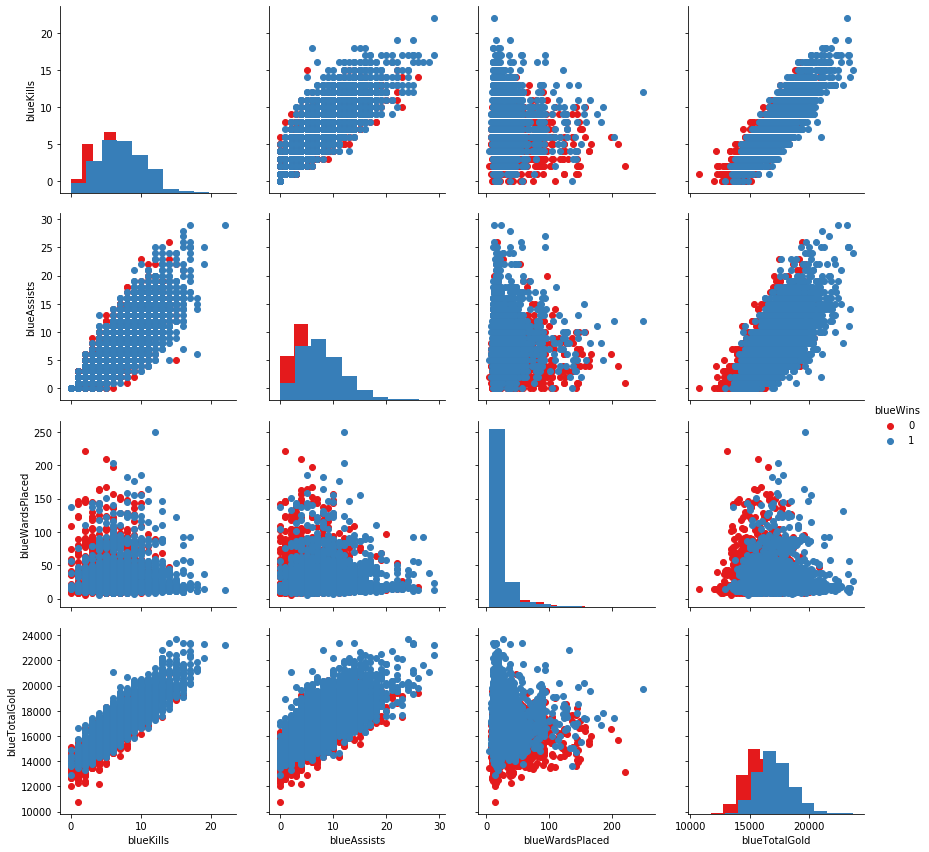

In [151]:
gr = sns.PairGrid(data=df_1, vars=['blueKills', 'blueAssists', 'blueWardsPlaced', 'blueTotalGold'],
                  hue='blueWins', size=3, palette='Set1')
gr.map_diag(plt.hist)
gr.map_offdiag(plt.scatter)
gr.add_legend();

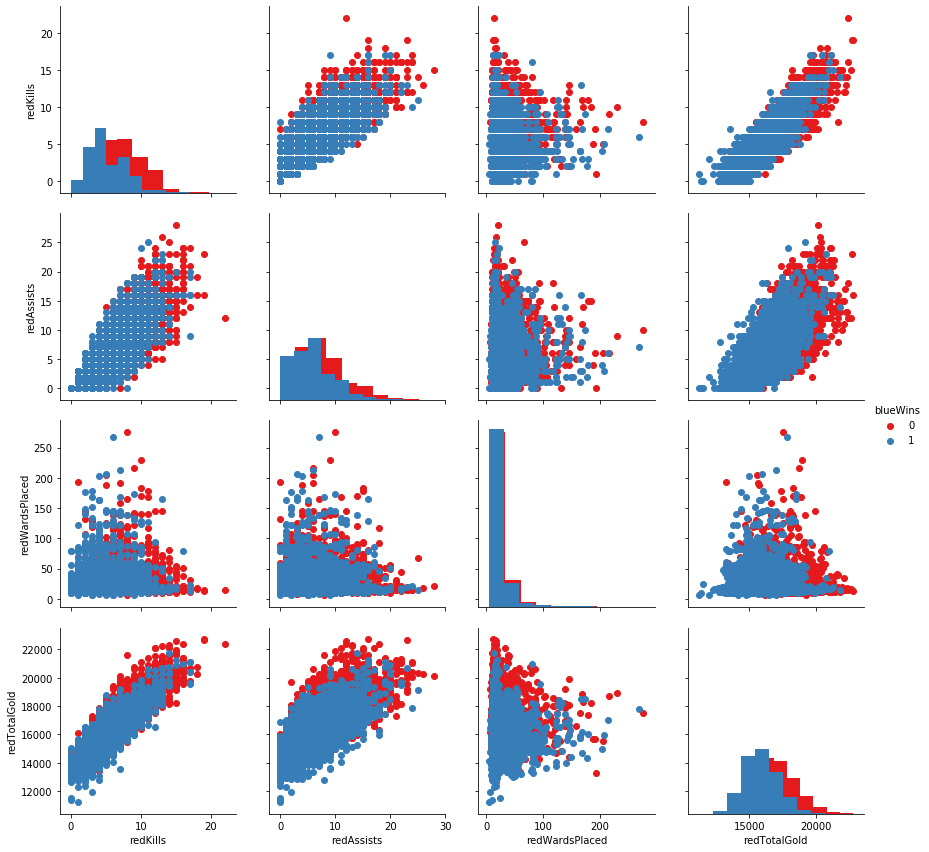

In [147]:
gr = sns.PairGrid(data=df_1, vars=['redKills', 'redAssists', 'redWardsPlaced', 'redTotalGold'],
                  hue='blueWins', size=3, palette='Set1')
gr.map_diag(plt.hist)
gr.map_offdiag(plt.scatter)
gr.add_legend();

In [148]:
st = df.drop(['gameId'], axis = 1)
st.corr()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
blueWins,1.000000,0.000087,0.044247,0.201769,0.337358,-0.339297,0.276685,0.221944,0.213768,0.092385,...,-0.103696,-0.411396,-0.352127,-0.387588,-0.212171,-0.110994,-0.511119,-0.489558,-0.212171,-0.411396
blueWardsPlaced,0.000087,1.000000,0.034447,0.003228,0.018138,-0.002612,0.033217,0.019892,0.017676,0.010104,...,-0.008225,-0.005685,-0.008882,-0.013000,-0.012395,0.001224,-0.015800,-0.027943,-0.012395,-0.005685
blueWardsDestroyed,0.044247,0.034447,1.000000,0.017717,0.033748,-0.073182,0.067793,0.041700,0.040504,0.016940,...,-0.023943,-0.067467,-0.059090,-0.057314,0.040023,-0.035732,-0.078585,-0.077946,0.040023,-0.067467
blueFirstBlood,0.201769,0.003228,0.017717,1.000000,0.269425,-0.247929,0.229485,0.151603,0.134309,0.077509,...,-0.069584,-0.301479,-0.182602,-0.194920,-0.156711,-0.024559,-0.378511,-0.240665,-0.156711,-0.301479
blueKills,0.337358,0.018138,0.033748,0.269425,1.000000,0.004044,0.813667,0.178540,0.170436,0.076195,...,-0.082491,-0.161127,-0.412219,-0.462333,-0.472203,-0.214454,-0.654148,-0.583730,-0.472203,-0.161127
blueDeaths,-0.339297,-0.002612,-0.073182,-0.247929,0.004044,1.000000,-0.026372,-0.204764,-0.188852,-0.095527,...,0.156780,0.885728,0.433383,0.464584,-0.040521,-0.100271,0.640000,0.577613,-0.040521,0.885728
blueAssists,0.276685,0.033217,0.067793,0.229485,0.813667,-0.026372,1.000000,0.149043,0.170873,0.028434,...,-0.060880,-0.133948,-0.356928,-0.396652,-0.337515,-0.160915,-0.549761,-0.437002,-0.337515,-0.133948
blueEliteMonsters,0.221944,0.019892,0.041700,0.151603,0.178540,-0.204764,0.149043,1.000000,0.781039,0.640271,...,-0.052029,-0.216616,-0.169649,-0.189816,-0.074838,-0.087893,-0.281464,-0.263991,-0.074838,-0.216616
blueDragons,0.213768,0.017676,0.040504,0.134309,0.170436,-0.188852,0.170873,0.781039,1.000000,0.020381,...,-0.032865,-0.192871,-0.149806,-0.159485,-0.059803,-0.098446,-0.233875,-0.211496,-0.059803,-0.192871
blueHeralds,0.092385,0.010104,0.016940,0.077509,0.076195,-0.095527,0.028434,0.640271,0.020381,1.000000,...,-0.042872,-0.109557,-0.087337,-0.107718,-0.046253,-0.019622,-0.162943,-0.162496,-0.046253,-0.109557


In [149]:
df.drop(['gameId'], axis = 1).describe()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


In [68]:
print('blueWins', '=', len(df[df['blueWins'] == 1]),
      '\nblueLose', '=', len(df[df['blueWins'] == 0]))

blueWins = 4930 
blueLose = 4949


In [69]:
df = df.drop(['gameId'], axis = 1)
df

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,7,4,5,1,1,0,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,1,54,0,0,6,4,8,1,1,0,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,0,23,1,0,6,7,5,0,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,0,14,4,1,2,3,3,1,1,0,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [70]:
X = np.array(df)
Y = np.array(df)

In [71]:
X_train, X_pred, Y_train, Y_pred = train_test_split(X, Y, test_size=0.20, random_state=1)

In [152]:
X_train = X_train[:,1:]
X_pred = X_pred[:,1:]
Y_train = Y_train[:,:1]
Y_pred = Y_pred[:,:1]

array([[ 6.0000e+00,  0.0000e+00,  5.0000e+00, ...,  6.1300e+02,
         2.3300e+01,  1.6403e+03],
       [ 3.0000e+00,  1.0000e+00,  8.0000e+00, ...,  1.8720e+03,
         2.0400e+01,  1.7163e+03],
       [ 2.0000e+00,  1.0000e+00,  8.0000e+00, ..., -9.2900e+02,
         1.9800e+01,  1.5300e+03],
       ...,
       [ 0.0000e+00,  0.0000e+00,  5.0000e+00, ...,  1.0080e+03,
         2.3300e+01,  1.6002e+03],
       [ 0.0000e+00,  0.0000e+00,  5.0000e+00, ...,  5.3640e+03,
         2.1800e+01,  1.9447e+03],
       [ 1.0000e+00,  0.0000e+00,  1.0000e+00, ...,  1.5920e+03,
         2.5000e+01,  1.7065e+03]])

In [153]:
scaler = Normalizer().fit(X_train)
normalized_X_train = scaler.transform(X_train)
normalized_X_pred = scaler.transform(X_pred)

array([[ 1.70325568e-04,  0.00000000e+00,  1.41937973e-04, ...,
         1.74015955e-02,  6.61430954e-04,  4.65641714e-02],
       [ 8.51726753e-05,  2.83908918e-05,  2.27127134e-04, ...,
         5.31477494e-02,  5.79174192e-04,  4.87272875e-02],
       [ 5.80666638e-05,  2.90333319e-05,  2.32266655e-04, ...,
        -2.69719654e-02,  5.74859972e-04,  4.44209978e-02],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  1.45606892e-04, ...,
         2.93543495e-02,  6.78528118e-04,  4.66000298e-02],
       [ 0.00000000e+00,  0.00000000e+00,  1.45915723e-04, ...,
         1.56538387e-01,  6.36192550e-04,  5.67524611e-02],
       [ 2.81451516e-05,  0.00000000e+00,  2.81451516e-05, ...,
         4.48070813e-02,  7.03628789e-04,  4.80297011e-02]])

In [154]:
scaler2 = StandardScaler().fit(X_train)
standard_X_train = scaler2.transform(X_train)
standard_X_pred = scaler2.transform(X_pred)

array([[ 1.45316808, -1.01158168, -0.39188415, ...,  0.29903957,
         0.70726785, -0.05855438],
       [ 0.07954708,  0.98855092,  0.60748999, ...,  0.95785604,
        -0.62103348,  0.45524477],
       [-0.37832659,  0.98855092,  0.60748999, ..., -0.50786671,
        -0.89585445, -0.80423919],
       ...,
       [-1.29407393, -1.01158168, -0.39188415, ...,  0.50573735,
         0.70726785, -0.32965103],
       [-1.29407393, -1.01158168, -0.39188415, ...,  2.78516908,
         0.02021544,  1.99934642],
       [-0.83620026, -1.01158168, -1.72438301, ...,  0.81133609,
         1.48592725,  0.38899172]])

In [75]:
LR = LinearRegression()
LR.fit(X_train, Y_train)
LRN = LinearRegression()
LRN.fit(normalized_X_train, Y_train)
LRS = LinearRegression()
LRS.fit(standard_X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
prediction_LR = LR.predict(X_pred)
print(prediction_LR)
prediction_LRN = LRN.predict(normalized_X_pred)
print(prediction_LRN)
prediction_LRS = LRS.predict(standard_X_pred)
print(prediction_LRS)

[[0.9849444]
 [0.8521319]
 [0.8833819]
 ...
 [0.3521319]
 [0.5474444]
 [0.3208819]]
[[1.01033503]
 [0.87752253]
 [0.87752253]
 ...
 [0.35603815]
 [0.55721003]
 [0.30135065]]
[[1.01249723]
 [0.86894255]
 [0.90312223]
 ...
 [0.3650363 ]
 [0.53593473]
 [0.32743864]]


In [77]:
print("MAE - mean absolute error")
print("MAE (LR) =", mean_absolute_error(Y_pred, prediction_LR))
print("MAE (LRN) =", mean_absolute_error(Y_pred, prediction_LRN))
print("MAE (LRS) =", mean_absolute_error(Y_pred, prediction_LRS))                           

MAE - mean absolute error
MAE (LR) = 0.37019139980738947
MAE (LRN) = 0.36740083527778583
MAE (LRS) = 0.36891307512137617


In [78]:
print("MSE - mean squared error")
print("MAE (LR) =", mean_squared_error(Y_pred, prediction_LR))
print("MAE (LRN) =", mean_squared_error(Y_pred, prediction_LRN))
print("MAE (LRS) =", mean_squared_error(Y_pred, prediction_LRS))

MSE - mean squared error
MAE (LR) = 0.1792313372703359
MAE (LRN) = 0.1785446746737105
MAE (LRS) = 0.17954335332088614


In [79]:
print("r2_score (LR) =", r2_score(Y_pred, prediction_LR))
print("r2_score (LRN) =", r2_score(Y_pred, prediction_LRN))
print("r2_score (LRS) =", r2_score(Y_pred, prediction_LRS))

r2_score (LR) = 0.2829306705340251
r2_score (LRN) = 0.2856778725313459
r2_score (LRS) = 0.281682355682626


In [80]:
CLR = LogisticRegression(random_state=0, max_iter=500)
CLR.fit(X_train, Y_train)
prediction_CLR = CLR.predict(X_pred)
CLRN = LogisticRegression(random_state=0, max_iter=500)
CLRN.fit(normalized_X_train, Y_train)
prediction_CLRN = CLRN.predict(normalized_X_pred)
CLRS = LogisticRegression(random_state=0, max_iter=500)
CLRS.fit(standard_X_train, Y_train)
prediction_CLRS = CLRS.predict(standard_X_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_

In [81]:
print("MAE - mean absolute error")
print("MAE (CLR) =", mean_absolute_error(Y_pred, prediction_CLR))
print("MAE (CLRN) =", mean_absolute_error(Y_pred, prediction_CLRN))
print("MAE (CLRS) =", mean_absolute_error(Y_pred, prediction_CLRS))  

MAE - mean absolute error
MAE (CLR) = 0.2646761133603239
MAE (CLRN) = 0.26771255060728744
MAE (CLRS) = 0.26417004048583


In [82]:
acCLR = accuracy_score(Y_pred, prediction_CLR)
print(acCLR * 100,"%","CLR")
acCLRN = accuracy_score(Y_pred, prediction_CLRN)
print(acCLRN * 100,"%","CLRN")
acCLRS = accuracy_score(Y_pred, prediction_CLRS)
print(acCLRS * 100,"%","CLRS")

73.53238866396761 % CLR
73.22874493927125 % CLRN
73.582995951417 % CLRS


In [83]:
confusion_matrix(Y_pred, prediction_CLR)

array([[728, 274],
       [249, 725]], dtype=int64)

In [84]:
confusion_matrix(Y_pred, prediction_CLRN)

array([[717, 285],
       [244, 730]], dtype=int64)

In [85]:
confusion_matrix(Y_pred, prediction_CLRS)

array([[732, 270],
       [252, 722]], dtype=int64)

In [86]:
ABC = AdaBoostClassifier(n_estimators=125, random_state=0, learning_rate=1)
ABC.fit(X_train, Y_train)
prediction_ABC = ABC.predict(X_pred)
ABCN = AdaBoostClassifier(n_estimators=125, random_state=0, learning_rate=1)
ABCN.fit(normalized_X_train, Y_train)
prediction_ABCN = ABCN.predict(normalized_X_pred)
ABCS = AdaBoostClassifier(n_estimators=125, random_state=0, learning_rate=1)
ABCS.fit(standard_X_train, Y_train)
prediction_ABCS = ABCS.predict(standard_X_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [87]:
print(ABC.score(X_train, Y_train))
print(ABCN.score(normalized_X_train, Y_train))
print(ABCS.score(standard_X_train, Y_train))

0.741110970517525
0.7407313678349994
0.741110970517525


In [88]:
print("MAE - mean absolute error")
print("MAE (ABC) =", mean_absolute_error(Y_pred, prediction_ABC))
print("MAE (ABCN) =", mean_absolute_error(Y_pred, prediction_ABCN))
print("MAE (ABCS) =", mean_absolute_error(Y_pred, prediction_ABCS))  

MAE - mean absolute error
MAE (ABC) = 0.2646761133603239
MAE (ABCN) = 0.25708502024291496
MAE (ABCS) = 0.2646761133603239


In [89]:
acABC = accuracy_score(Y_pred, prediction_ABC)
print(acABC * 100,"%","ABC")
acABCN = accuracy_score(Y_pred, prediction_ABCN)
print(acABCN * 100,"%","ABCN")
acABCS = accuracy_score(Y_pred, prediction_ABCS)
print(acABCS * 100,"%","ABCS")

73.53238866396761 % ABC
74.2914979757085 % ABCN
73.53238866396761 % ABCS


In [90]:
confusion_matrix(Y_pred, prediction_ABC)

array([[716, 286],
       [237, 737]], dtype=int64)

In [91]:
confusion_matrix(Y_pred, prediction_ABCN)

array([[737, 265],
       [243, 731]], dtype=int64)

In [92]:
confusion_matrix(Y_pred, prediction_ABCS)

array([[716, 286],
       [237, 737]], dtype=int64)

In [93]:
SGDC = linear_model.SGDClassifier(max_iter=750, random_state=1, loss='log')
SGDC.fit(X_train, Y_train)
SGDCN = linear_model.SGDClassifier(max_iter=750, random_state=1, loss='log')
SGDCN.fit(normalized_X_train, Y_train)
SGDCS = linear_model.SGDClassifier(max_iter=750, random_state=1, loss='log')
SGDCS.fit(standard_X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=750,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=1, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [94]:
prediction_SGDC = SGDC.predict(X_pred)
prediction_SGDCN = SGDCN.predict(normalized_X_pred)
prediction_SGDCS = SGDCS.predict(standard_X_pred)

In [95]:
print("MAE - mean absolute error")
print("MAE (ABC) =", mean_absolute_error(Y_pred, prediction_SGDC))
print("MAE (ABCN) =", mean_absolute_error(Y_pred, prediction_SGDCN))
print("MAE (ABCS) =", mean_absolute_error(Y_pred, prediction_SGDCS))  

MAE - mean absolute error
MAE (ABC) = 0.4159919028340081
MAE (ABCN) = 0.2682186234817814
MAE (ABCS) = 0.2631578947368421


In [155]:
acSGDC = accuracy_score(Y_pred, prediction_SGDC)
print(acSGDC * 100,"%","SGDC")
acSGDC = accuracy_score(Y_pred, prediction_SGDCN)
print(acSGDC * 100,"%","SGDCN")
acSGDC = accuracy_score(Y_pred, prediction_SGDCS)
print(acSGDC * 100,"%","SGDCS")

58.40080971659919 % SGDC
73.17813765182186 % SGDCN
73.68421052631578 % SGDCS


In [97]:
confusion_matrix(Y_pred, prediction_SGDC)

array([[987,  15],
       [807, 167]], dtype=int64)

In [98]:
confusion_matrix(Y_pred, prediction_SGDCN)

array([[734, 268],
       [262, 712]], dtype=int64)

In [99]:
confusion_matrix(Y_pred, prediction_SGDCS)

array([[714, 288],
       [232, 742]], dtype=int64)

In [158]:
ETC = ExtraTreeClassifier(random_state=1)
ETC.fit(X_train, Y_train)
ETCN = ExtraTreeClassifier(random_state=1)
ETCN.fit(normalized_X_train, Y_train)
ETCS = ExtraTreeClassifier(random_state=1)
ETCS.fit(standard_X_train, Y_train)

ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, random_state=1,
                    splitter='random')

In [159]:
prediction_ETC = ETC.predict(X_pred)
prediction_ETCN = ETCN.predict(normalized_X_pred)
prediction_ETCS = ETCS.predict(standard_X_pred)

In [161]:
print("MAE - mean absolute error")
print("MAE (ETC) =", mean_absolute_error(Y_pred, prediction_ETC))
print("MAE (ETCN) =", mean_absolute_error(Y_pred, prediction_ETCN))
print("MAE (ETCS) =", mean_absolute_error(Y_pred, prediction_ETCS))  

MAE - mean absolute error
MAE (ETC) = 0.3507085020242915
MAE (ETCN) = 0.35931174089068824
MAE (ETCS) = 0.3507085020242915


In [162]:
acETC = accuracy_score(Y_pred, prediction_ETC)
print(acETC * 100,"%","ETC")
acETCN = accuracy_score(Y_pred, prediction_ETCN)
print(acETCN * 100,"%","ETC")
acETCS = accuracy_score(Y_pred, prediction_ETCS)
print(acETCS * 100,"%","ETC")

64.92914979757086 % ETC
64.06882591093117 % ETC
64.92914979757086 % ETC


In [104]:
confusion_matrix(Y_pred, prediction_ETC)

array([[650, 352],
       [358, 616]], dtype=int64)

In [105]:
confusion_matrix(Y_pred, prediction_ETCN)

array([[615, 387],
       [339, 635]], dtype=int64)

In [106]:
confusion_matrix(Y_pred, prediction_ETCS)

array([[650, 352],
       [358, 616]], dtype=int64)

In [107]:
ETsC = ExtraTreesClassifier(random_state=1, n_estimators=100)
ETsC.fit(X_train, Y_train)
ETsCN = ExtraTreesClassifier(random_state=1, n_estimators=100)
ETsCN.fit(normalized_X_train, Y_train)
ETsCS = ExtraTreesClassifier(random_state=1, n_estimators=100)
ETsCS.fit(standard_X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=1, verbose=0,
                     warm_start=False)

In [108]:
prediction_ETsC = ETsC.predict(X_pred)
prediction_ETsCN = ETsCN.predict(normalized_X_pred)
prediction_ETsCS = ETsCS.predict(standard_X_pred)

In [163]:
print("MAE - mean absolute error")
print("MAE (ETsC) =", mean_absolute_error(Y_pred, prediction_ETsC))
print("MAE (ETsCN) =", mean_absolute_error(Y_pred, prediction_ETsCN))
print("MAE (ETsCN) =", mean_absolute_error(Y_pred, prediction_ETsCN))  

MAE - mean absolute error
MAE (ETsC) = 0.27884615384615385
MAE (ETsCN) = 0.2818825910931174
MAE (ETsCN) = 0.2818825910931174


In [164]:
acETsC = accuracy_score(Y_pred, prediction_ETsC)
print(acETsC * 100,"%","ETsC")
acETsCN = accuracy_score(Y_pred, prediction_ETsCN)
print(acETsCN * 100,"%","ETsC")
acETsCS = accuracy_score(Y_pred, prediction_ETsCS)
print(acETsCS * 100,"%","ETsC")

72.11538461538461 % ETsC
71.81174089068826 % ETsC
72.11538461538461 % ETsC


In [111]:
confusion_matrix(Y_pred, prediction_ETsC)

array([[729, 273],
       [278, 696]], dtype=int64)

In [112]:
confusion_matrix(Y_pred, prediction_ETsCN)

array([[719, 283],
       [274, 700]], dtype=int64)

In [113]:
confusion_matrix(Y_pred, prediction_ETsCS)

array([[729, 273],
       [278, 696]], dtype=int64)

In [114]:
#Пробуем предсказания по голубой команде

In [115]:
dfb = df[['blueWins',
 'blueWardsPlaced',
 'blueWardsDestroyed',
 'blueFirstBlood',
 'blueKills',
 'blueDeaths',
 'blueAssists',
 'blueEliteMonsters',
 'blueDragons',
 'blueHeralds',
 'blueTowersDestroyed',
 'blueTotalGold',
 'blueAvgLevel',
 'blueTotalExperience',
 'blueTotalMinionsKilled',
 'blueTotalJungleMinionsKilled',
 'blueGoldDiff',
 'blueExperienceDiff',
 'blueCSPerMin',
 'blueGoldPerMin',]]
dfb

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0
1,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2
2,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3
3,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7
4,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,7,4,5,1,1,0,0,17765,7.2,18967,211,69,2519,2469,21.1,1776.5
9875,1,54,0,0,6,4,8,1,1,0,0,16238,7.2,19255,233,48,782,888,23.3,1623.8
9876,0,23,1,0,6,7,5,0,0,0,0,15903,7.0,18032,210,45,-2416,-1877,21.0,1590.3
9877,0,14,4,1,2,3,3,1,1,0,0,14459,6.6,17229,224,48,-839,-1085,22.4,1445.9


In [116]:
Z = np.array(dfb)
W = np.array(dfb)

In [117]:
Z_train, Z_pred, W_train, W_pred = train_test_split(Z, W, test_size=0.20, random_state=1)

In [118]:
Z_train = Z_train[:,1:]
Z_pred = Z_pred[:,1:]
W_train = W_train[:,:1]
W_pred = W_pred[:,:1]

In [119]:
scaler_b = Normalizer().fit(Z_train)
normalized_Z_train = scaler.transform(Z_train)
normalized_Z_pred = scaler.transform(Z_pred)

In [120]:
scaler_b2 = StandardScaler().fit(Z_train)
standard_Z_train = scaler_b2.transform(Z_train)
standard_Z_pred = scaler_b2.transform(Z_pred)

In [121]:
LR2 = LinearRegression()
LR2.fit(Z_train, W_train)
LRN2 = LinearRegression()
LRN2.fit(normalized_Z_train, W_train)
LRS2 = LinearRegression()
LRS2.fit(standard_Z_train, W_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [122]:
prediction_LR2 = LR2.predict(Z_pred)
print(prediction_LR2)
prediction_LRN2 = LRN2.predict(normalized_Z_pred)
print(prediction_LRN2)
prediction_LRS2 = LRS2.predict(standard_Z_pred)
print(prediction_LRS2)

[[0.97440855]
 [0.86409787]
 [0.88047987]
 ...
 [0.35906793]
 [0.56120573]
 [0.31212896]]
[[0.99433291]
 [0.88213909]
 [0.87902318]
 ...
 [0.35052671]
 [0.58499058]
 [0.30786148]]
[[0.97440855]
 [0.86409787]
 [0.88047987]
 ...
 [0.35906793]
 [0.56120573]
 [0.31212896]]


In [123]:
print("MAE - mean absolute error")
print("MAE (LR2) =", mean_absolute_error(W_pred, prediction_LR2))
print("MAE (LRN2) =", mean_absolute_error(W_pred, prediction_LRN2))
print("MAE (LRS2) =", mean_absolute_error(W_pred, prediction_LRS2))

MAE - mean absolute error
MAE (LR2) = 0.37190652041129596
MAE (LRN2) = 0.36813452901214055
MAE (LRS2) = 0.3719065204112955


In [124]:
print("MSE - mean squared error")
print("MAE (LR2) =", mean_squared_error(W_pred, prediction_LR2))
print("MAE (LRN2) =", mean_squared_error(W_pred, prediction_LRN2))
print("MAE (LRS2) =", mean_squared_error(W_pred, prediction_LRS2))

MSE - mean squared error
MAE (LR2) = 0.1801495945962878
MAE (LRN2) = 0.17937232288953336
MAE (LRS2) = 0.18014959459628785


In [125]:
print("r2_score (LR) =", r2_score(W_pred, prediction_LR2))
print("r2_score (LRN) =", r2_score(W_pred, prediction_LRN2))
print("r2_score (LRS) =", r2_score(W_pred, prediction_LRS2))

r2_score (LR) = 0.2792569035743757
r2_score (LRN) = 0.2823666148004579
r2_score (LRS) = 0.2792569035743754


In [126]:
CLR2 = LogisticRegression(random_state=0, max_iter=500)
CLR2.fit(Z_train, W_train)
prediction_CLR2 = CLR2.predict(Z_pred)
CLRN2 = LogisticRegression(random_state=0, max_iter=500)
CLRN2.fit(normalized_Z_train, W_train)
prediction_CLRN2 = CLRN2.predict(normalized_Z_pred)
CLRS2 = LogisticRegression(random_state=0, max_iter=500)
CLRS2.fit(standard_Z_train, W_train)
prediction_CLRS2 = CLRS2.predict(standard_Z_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_

In [127]:
print("MAE - mean absolute error")
print("MAE (CLR2) =", mean_absolute_error(W_pred, prediction_CLR2))
print("MAE (CLRN2) =", mean_absolute_error(W_pred, prediction_CLRN2))
print("MAE (CLRS2) =", mean_absolute_error(W_pred, prediction_CLRS2))  

MAE - mean absolute error
MAE (CLR2) = 0.25961538461538464
MAE (CLRN2) = 0.2722672064777328
MAE (CLRS2) = 0.26366396761133604


In [128]:
acCLR2 = accuracy_score(W_pred, prediction_CLR2)
print(acCLR2 * 100,"%","CLR2")
acCLRN2 = accuracy_score(Y_pred, prediction_CLRN2)
print(acCLRN2 * 100,"%","CLRN2")
acCLRS2 = accuracy_score(Y_pred, prediction_CLRS2)
print(acCLRS2 * 100,"%","CLRS2")

74.03846153846155 % CLR2
72.77327935222672 % CLRN2
73.6336032388664 % CLRS2


In [129]:
confusion_matrix(W_pred, prediction_CLR2)

array([[731, 271],
       [242, 732]], dtype=int64)

In [130]:
confusion_matrix(W_pred, prediction_CLRN2)

array([[701, 301],
       [237, 737]], dtype=int64)

In [131]:
confusion_matrix(W_pred, prediction_CLRS2)

array([[724, 278],
       [243, 731]], dtype=int64)

In [132]:
SGDC2 = linear_model.SGDClassifier(max_iter=750, random_state=1, loss='log')
SGDC2.fit(Z_train, W_train)
SGDCN2 = linear_model.SGDClassifier(max_iter=750, random_state=1, loss='log')
SGDCN2.fit(normalized_Z_train, W_train)
SGDCS2 = linear_model.SGDClassifier(max_iter=750, random_state=1, loss='log')
SGDCS2.fit(standard_Z_train, W_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=750,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=1, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [133]:
prediction_SGDC2 = SGDC2.predict(Z_pred)
prediction_SGDCN2 = SGDCN2.predict(normalized_Z_pred)
prediction_SGDCS2 = SGDCS2.predict(standard_Z_pred)

In [134]:
print("MAE - mean absolute error")
print("MAE (SGDC2) =", mean_absolute_error(W_pred, prediction_SGDC2))
print("MAE (SGDCN2) =", mean_absolute_error(W_pred, prediction_SGDCN2))
print("MAE (SGDCS2) =", mean_absolute_error(W_pred, prediction_SGDCS2))  

MAE - mean absolute error
MAE (SGDC2) = 0.4180161943319838
MAE (SGDCN2) = 0.26973684210526316
MAE (SGDCS2) = 0.27530364372469635


In [135]:
acCLR2 = accuracy_score(W_pred, prediction_SGDC2)
print(acCLR2 * 100,"%","CLR2")
acCLRN2 = accuracy_score(Y_pred, prediction_SGDCN2)
print(acCLRN2 * 100,"%","CLRN2")
acCLRS2 = accuracy_score(Y_pred, prediction_SGDCN2)
print(acCLRS2 * 100,"%","CLRS2")

58.198380566801625 % CLR2
73.02631578947368 % CLRN2
73.02631578947368 % CLRS2


In [136]:
confusion_matrix(W_pred, prediction_SGDC2)

array([[197, 805],
       [ 21, 953]], dtype=int64)

In [137]:
confusion_matrix(Y_pred, prediction_SGDCN2)

array([[719, 283],
       [250, 724]], dtype=int64)

In [138]:
confusion_matrix(Y_pred, prediction_SGDCN2)

array([[719, 283],
       [250, 724]], dtype=int64)